In [40]:
import struct
import pygame
import numpy as np
import matplotlib.pyplot as plt
import librosa
import os
import IPython
from scipy.io import wavfile
import IPython.display as ipd
import math
from scipy import signal
import statistics

# workspace establishing
os.chdir('D:/STUDIA MGR IFE/Semestr II/Sound data processing')
# audio file path establishing
audio_file = './seq/KDF_piano.wav'

In [70]:
def sound_create(freq):
    T = len(data)/samplerate    # seconds
    t = np.linspace(0, T, int(T*samplerate), endpoint=False) # time variable
    return 0.5*np.sin(2*np.pi*freq*t)
final_fund_freq = []

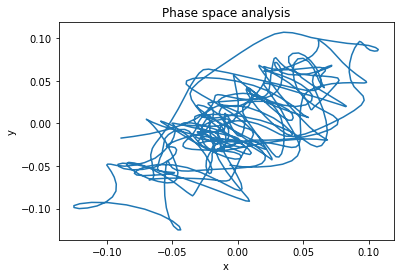

IndexError: list index out of range

In [98]:
# Time domain methods
# Loading dataset
data, samplerate = librosa.load(audio_file, sr=44100)
# Setting the delay for signal coordinates
k=10
# Setting time window
window_num = 7
data_window = data[data_start[window_num]:data_start[window_num]+1000]
data_start = [100, 30000, 78000, 127000, 174000, 224000, 271000, 296000, 
             320000, 377000, 388000, 415000]
data_stop = [29000, 77000, 126000, 173000, 223000, 270000, 295000, 319000,
            376000, 387000, 414000, 462000]
# Creating coordinates arrays
xt = []
yt = []
zt = []
# Creating an empty array for distance between signal values
points_distance = []
# Creating empty array for fundamental frequency values
fund_freq = []
# Actual implementation of phase space analysis method
for i in range(len(data_window)-2*k):
    xt.append(data_window[i+2*k])
    yt.append(data_window[i+k])
    zt.append(data_window[i])
    points_distance = ((xt[i]-xt[0])**2+(yt[i]-yt[0])**2+(zt[i]-zt[0])**2)**0.5
    if points_distance<0.03 and i>10:
        fund_freq.append(samplerate/i)
# Plotting the signal coordinates on two dimensional plot
plt.title("Phase space analysis")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xt, yt)
plt.show()

print(f"Fundamental frequency: {fund_freq[0]} Hz")


In [97]:
final_fund_freq.append(fund_freq[0])
print(f"final fundamental frequency: {final_fund_freq}")

final fundamental frequency: [495.5056179775281, 82.73921200750469, 358.5365853658537, 117.2872340425532, 300.0, 286.3636363636364]


In [99]:
# Time domain methods
# Loading dataset
data, samplerate = librosa.load(audio_file, sr=44100)
# Setting the delay for signal coordinates
k=10
# Setting time window
# data_window = data[10000:11000]
data_start = [100, 30000, 78000, 126000, 174000, 224000, 271000, 296000, 
             320000, 377000, 388000, 415000]
data_stop = [29000, 77000, 126000, 173000, 223000, 270000, 295000, 319000,
            376000, 387000, 414000, 462000]
# Creating coordinates arrays

# Creating an empty array for distance between signal values

# Creating empty array for fundamental frequency values

# Actual implementation of phase space analysis method
# data_window = data[data_start[0]:data_stop[0]]
for j in range(len(data_start)):
    xt = []
    yt = []
    zt = []
    points_distance = []
    fund_freq = []
    data_window = data[data_start[j]:data_start[j]+1000]
    for i in range(len(data_window)-2*k):
        xt.append(data_window[i+2*k])
        yt.append(data_window[i+k])
        zt.append(data_window[i])
        points_distance = ((xt[i]-xt[0])**2+(yt[i]-yt[0])**2+(zt[i]-zt[0])**2)**0.5
        if points_distance<0.003 and i>10:
            fund_freq.append(samplerate/i)
        final_fund_freq.append(fund_freq[0])
# Plotting the signal coordinates on two dimensional plot
# plt.title("Phase space analysis")
# plt.xlabel("x")
# plt.ylabel("y")
# plt.plot(xt, yt)
# plt.show()
print(f"Fundamental frequency: {fund_freq[0]} Hz")

IndexError: list index out of range

In [4]:
# Actual audio file sound
print(f"audio file path: {audio_file}")
ipd.Audio(audio_file)

audio file path: ./natural/viola/196Hz.wav


In [5]:
# Created sound with fundamental frequency
print(f"Fundamental frequency: {fund_freq[0]}")
x = sound_create(fund_freq[0])
ipd.Audio(x, rate=samplerate)

Fundamental frequency: 197.7578475336323


In [6]:
# Frequency domain methods

# Function calculating cepstral
def cepstral(data, samplerate):
    windowed_data = np.hamming(data.size) * data
    freq_vector = np.fft.rfftfreq(windowed_data.size, 1/samplerate) #frequency bin centers
    X = np.fft.rfft(windowed_data) #fast fourier transform
    log_X = np.log(np.abs(X))
    cepstrum = np.fft.rfft(log_X)
    quefrency_vector = np.fft.rfftfreq(log_X.size, freq_vector[1] - freq_vector[0])
    return quefrency_vector, cepstrum
# function calculating fundamental frequency (extracting pitch) from cepstral
def fundamental_frequency(data, samplerate, fmin=10, fmax=2000):
    quefrency_vector, cepstrum = cepstral(data, samplerate)
    # extract peak in cepstrum in valid region
    valid = (quefrency_vector > 1/fmax) & (quefrency_vector <= 1/fmin)
    max_quefrency_index = np.argmax(np.abs(cepstrum)[valid])
    f0 = 1/quefrency_vector[valid][max_quefrency_index]
    return f0

In [7]:
def sound_create(freq):
    T = 1    # seconds
    t = np.linspace(0, T, int(T*samplerate), endpoint=False) # time variable
    return 0.5*np.sin(2*np.pi*freq*t)

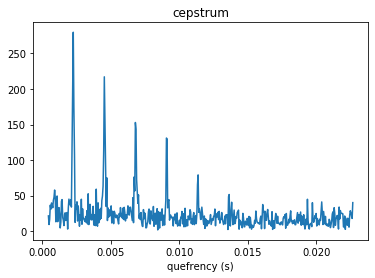

Fundamental frequency: 441 Hz


In [12]:
# Data loading and windowing
audio_file = './natural/viola/440Hz.wav'
data, samplerate = librosa.load(audio_file, sr=44100)
data = data[25000:27000]

quefrency_vector, cepstrum = cepstral(data, samplerate)
# # Plotting cepstrum
# plt.title("audio file data")
# plt.xlabel("frequency [Hz]")
# plt.ylabel("amplitude")
# plt.plot(data)
# plt.show()
fig, ax = plt.subplots()
ax.plot(quefrency_vector[10:], np.abs(cepstrum[10:]))
ax.set_xlabel('quefrency (s)')
ax.set_title('cepstrum')
plt.show()
# Initializing function calculating fundamental frequency
fund_freq = int(round(fundamental_frequency(data, samplerate)))
print(f"Fundamental frequency: {fund_freq} Hz")

In [13]:
# Actual audio file sound
print(f"audio file path: {audio_file}")
ipd.Audio(audio_file)

audio file path: ./natural/viola/440Hz.wav


In [14]:
# Created sound with fundamental frequency
x = sound_create(fund_freq)
print(f"Fundamental frequency: {fund_freq}")
ipd.Audio(x, rate=samplerate)

Fundamental frequency: 441
